## 2. Data Understanding
**Objective**:
- Gather and explore the data to understand its structure, quality, and potential insights.

**Requirements**:
- Access to historical sales data and related metadata (e.g., item prices, shop details).
- Tools for data exploration and visualization (e.g., Python, Jupyter notebooks).

**Tasks**:


In [25]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Load datasets
item_categories = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/predict-future-sales/datasets/item_categories.csv')
shops = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/predict-future-sales/datasets/shops.csv')
sample_submission = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/predict-future-sales/datasets/sample_submission.csv')
sales_train = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/predict-future-sales/datasets/sales_train.csv')
items = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/predict-future-sales/datasets/items.csv')
# set index to ID to avoid droping it later
test = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/predict-future-sales/datasets/test.csv').set_index('ID')

In [66]:
# Import the display function from IPython.display
from IPython.display import display

# Display the first few rows of each dataframe
display(item_categories.head(), test.head(), shops.head(), sample_submission.head(), sales_train.head(), items.head())

,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


,shop_id,item_id,shop_id_encoded,item_id_encoded
ID,,,,
0,5,5037,3,5037
1,5,5320,3,5320
2,5,5233,3,5233
3,5,5232,3,5232
4,5,5268,3,5268


,shop_id,city_code
0,0,0
1,1,0
2,2,1
3,3,2
4,4,3


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_id_encoded,item_id_encoded,revenue
0,02.01.2013,0,59,22154,999.00,1.0,56,22153,999.00
1,03.01.2013,0,25,2552,899.00,1.0,22,2552,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,22,2552,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,22,2554,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,22,2555,1099.00


,item_id,item_category_id,item_category_id_encoded
0,0,40,40
1,1,76,76
2,2,40,40
3,3,40,40
4,4,40,40


In [67]:
# Display the shape and basic info of each dataset
item_categories_info = item_categories.info()
test_info = test.info()
shops_info = shops.info()
sample_submission_info = sample_submission.info()
sales_train_info = sales_train.info()
items_info = items.info()

display(item_categories_info, test_info, shops_info, sample_submission_info, sales_train_info, items_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   item_category_id  84 non-null     int64
 1   type_code         84 non-null     int64
 2   subtype_code      84 non-null     int64
dtypes: int64(3)
memory usage: 2.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 214200 entries, 0 to 214199
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   shop_id          214200 non-null  int64
 1   item_id          214200 non-null  int64
 2   shop_id_encoded  214200 non-null  int64
 3   item_id_encoded  214200 non-null  int64
dtypes: int64(4)
memory usage: 8.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   shop_id    60 non-null     int64
 1   c

None

None

None

None

None

None

- item_categories.csv: Contains 84 item categories with IDs.
- test.csv: Contains 214,200 records with IDs, shop IDs, and item IDs for which predictions are needed.
- shops.csv: Contains 60 records with shop IDs and names.
- sample_submission.csv: Contains the structure for submission with IDs and item count per month.
- sales_train.csv: Contains 2,935,849 records of daily sales transactions.
- items.csv: Contains 22,170 records of item IDs, names, and category IDs.

### Initial Data Exploration

In [63]:
# Summarize sales_train data
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_id_encoded,item_id_encoded,revenue
count,2.935847e+06,2.935847e+06,2.935847e+06,2.935847e+06,2.935847e+06,2.935847e+06,2.935847e+06,2.935847e+06
mean,1.456991e+01,3.331065e+01,1.019723e+04,8.907496e+02,1.241903e+00,3.040460e+01,1.019657e+04,1.157628e+03
std,9.422985e+00,1.613679e+01,6.324299e+03,1.720490e+03,2.292963e+00,1.597497e+01,6.323929e+03,5.680784e+03
min,0.000000e+00,2.000000e+00,0.000000e+00,7.000000e-02,-2.200000e+01,0.000000e+00,0.000000e+00,-6.897000e+04
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,1.900000e+01,4.476000e+03,2.490000e+02
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,2.800000e+01,9.342000e+03,4.490000e+02
75%,2.300000e+01,4.800000e+01,1.568400e+04,9.990000e+02,1.000000e+00,4.500000e+01,1.568300e+04,1.078200e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,5.920000e+04,1.000000e+03,5.600000e+01,2.216800e+04,1.829990e+06


In [68]:
# Check for missing values in all datasets
datasets = [item_categories, test, shops, sample_submission, sales_train, items]
for dataset in datasets:
    print(f"{dataset.columns[0]}: {dataset.isnull().sum().sum()} missing values")


item_category_id: 0 missing values
shop_id: 0 missing values
shop_id: 0 missing values
ID: 0 missing values
date: 0 missing values
item_id: 0 missing values


Exploratory Data Analysis (EDA):

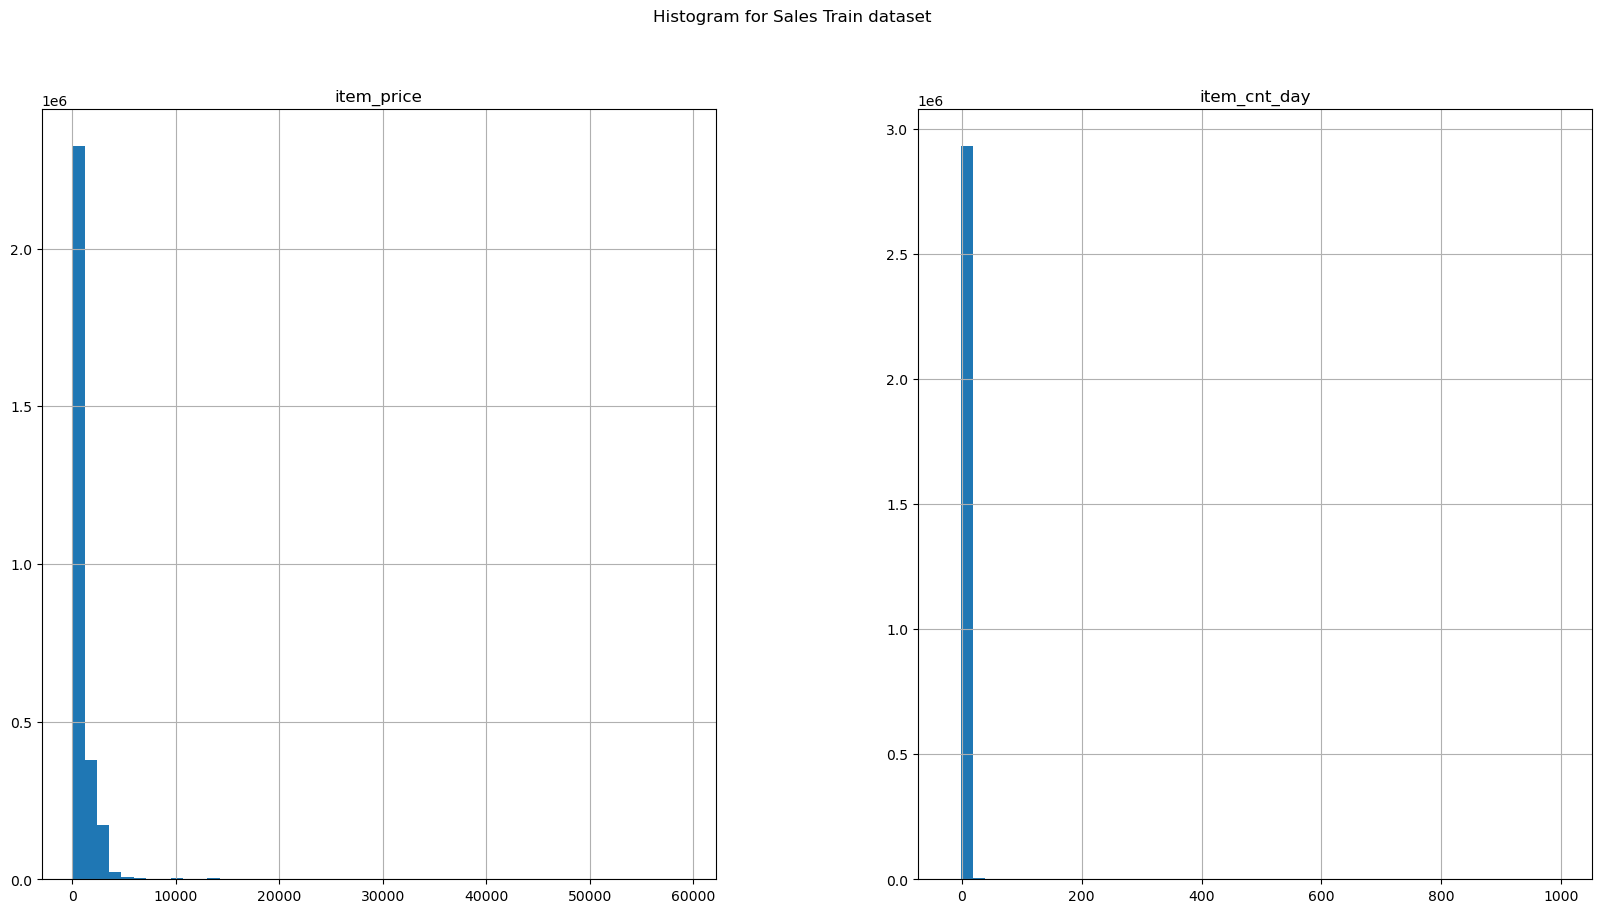

In [69]:
# Visualize data distributions using histograms
import matplotlib.pyplot as plt

def plot_histograms(df, columns, name):
    df[columns].hist(bins=50, figsize=(20,10))
    plt.suptitle(f"Histogram for {name} dataset")
    plt.show()

plot_histograms(sales_train, ['item_price', 'item_cnt_day'], 'Sales Train')


From the histograms, we see that:

- item_price: The data is right-skewed with a long tail, indicating a range of item prices with a few very high prices. Addressing outliers and possibly transforming the data might be necessary.
- item_cnt_day: The distribution shows that most daily sales are small, with both positive and negative values indicating sales and returns, respectively. There are also some extreme values that need to be handled.


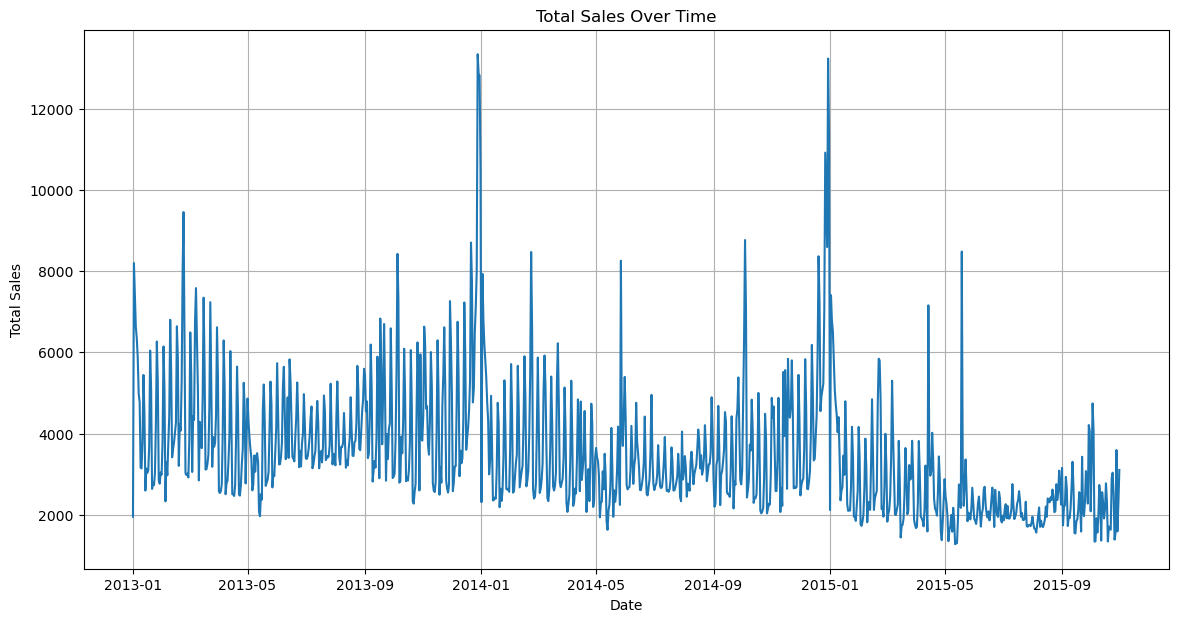

In [35]:
# Plot sales over time
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_by_date = sales_train.groupby('date')['item_cnt_day'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(sales_by_date['date'], sales_by_date['item_cnt_day'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

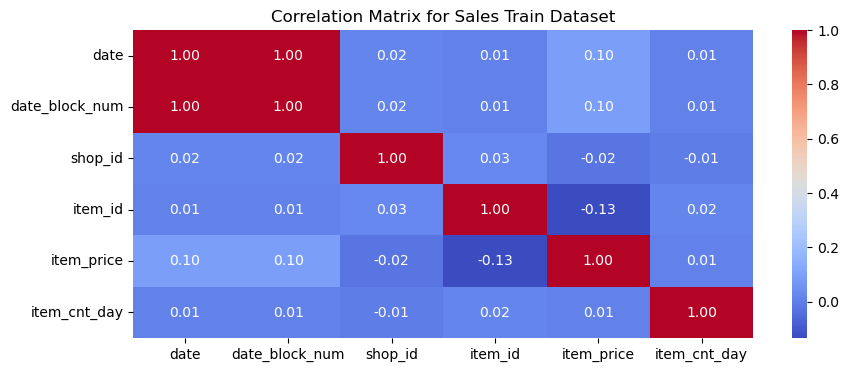

In [39]:
# Correlation Analysis
correlation = sales_train.corr()
# Plot correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Sales Train Dataset')
plt.show()

In [41]:
# Extract unique shop IDs from both datasets
unique_shops_test = test['shop_id'].unique()
unique_shops_train = sales_train['shop_id'].unique()

# Find shops in training data not present in test data
shops_in_train_not_in_test = set(unique_shops_train) - set(unique_shops_test)
shops_in_test_not_in_train = set(unique_shops_test) - set(unique_shops_train)

# Summary
print(f"Unique shops in test dataset: {len(unique_shops_test)}")
print(f"Unique shops in training dataset: {len(unique_shops_train)}")
print(f"Shops in training data not present in test data: {shops_in_train_not_in_test}")


Unique shops in test dataset: 42
Unique shops in training dataset: 60
Shops in training data not present in test data: {0, 1, 32, 33, 8, 9, 40, 11, 43, 13, 17, 51, 20, 54, 23, 27, 29, 30}


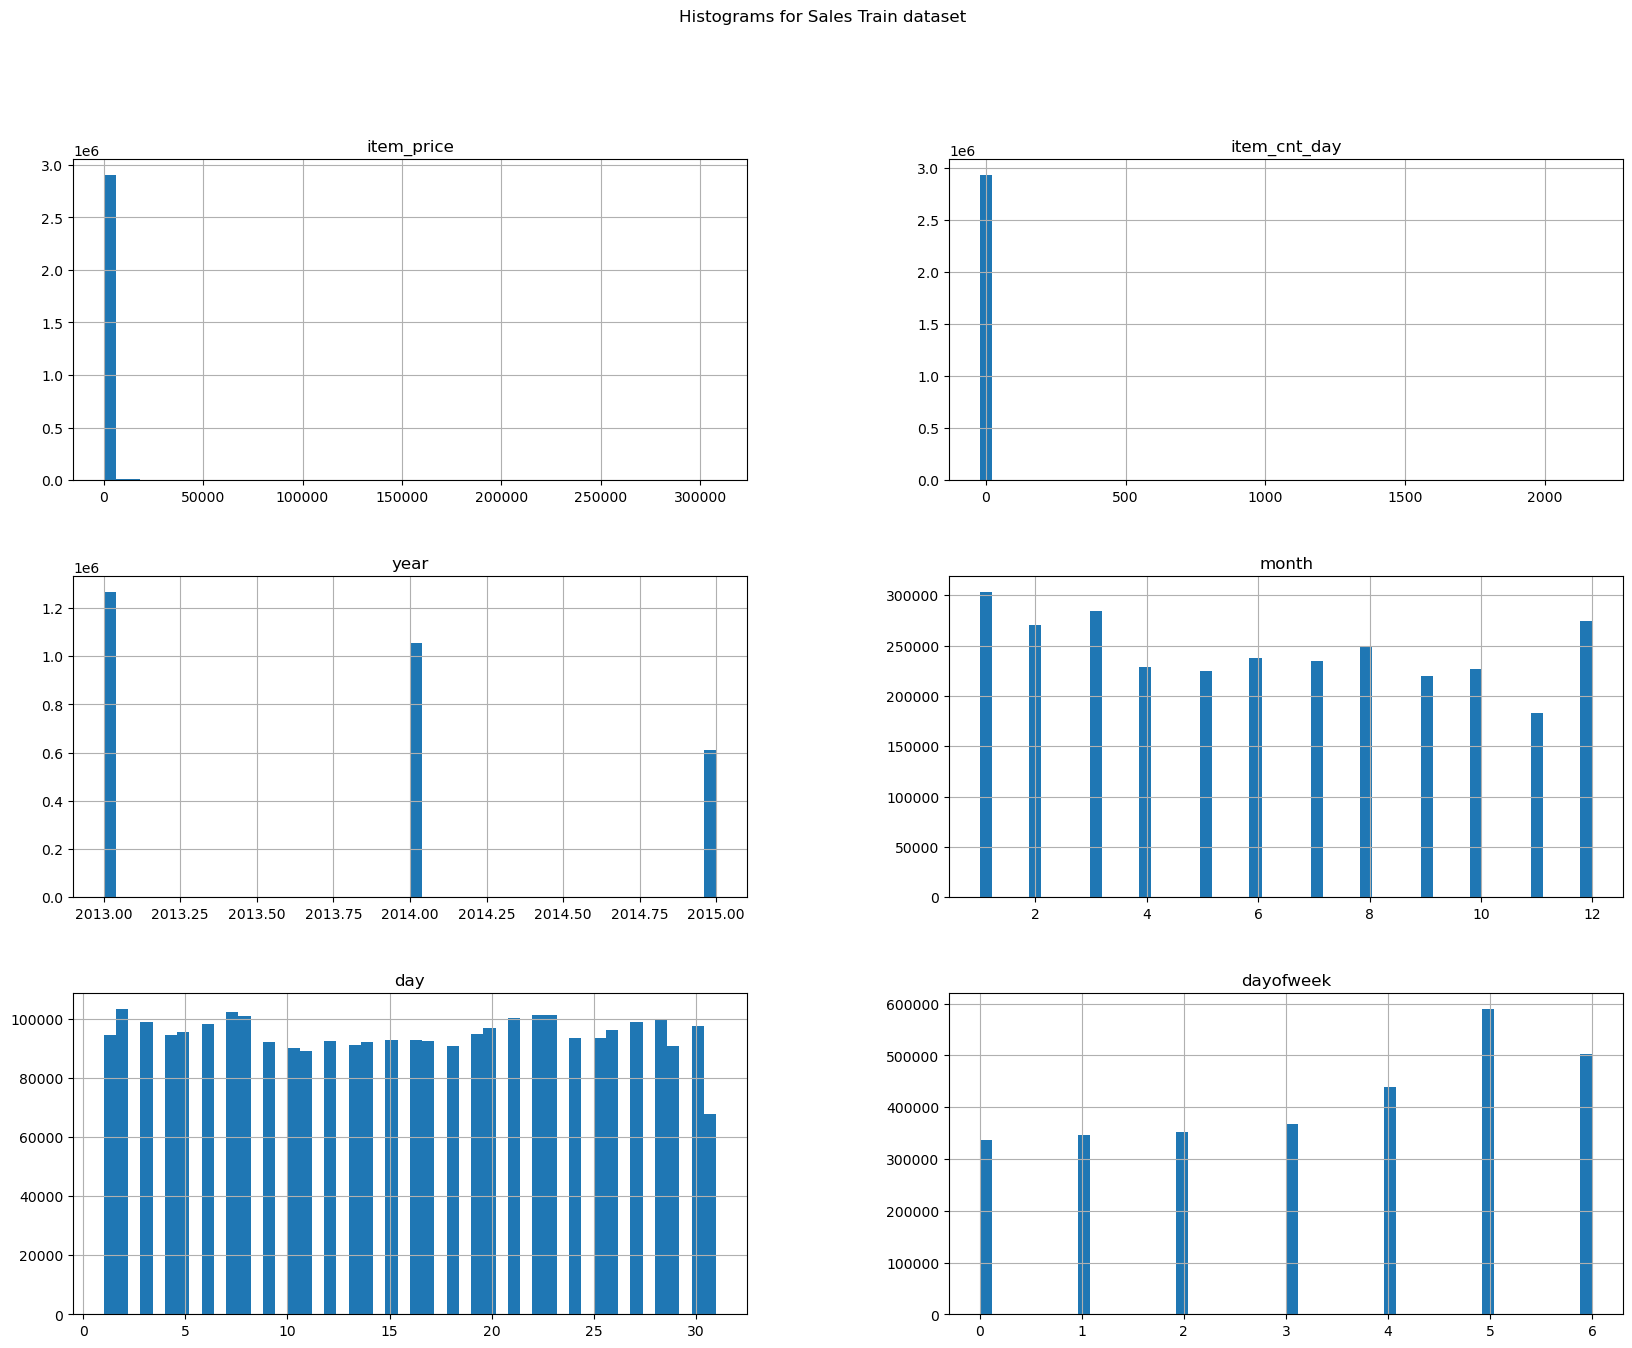

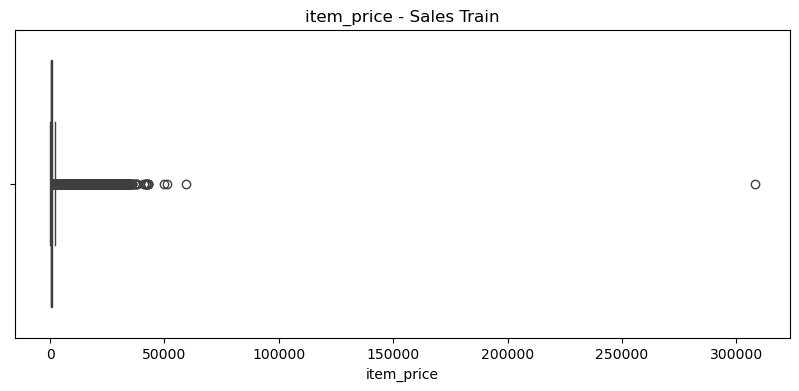

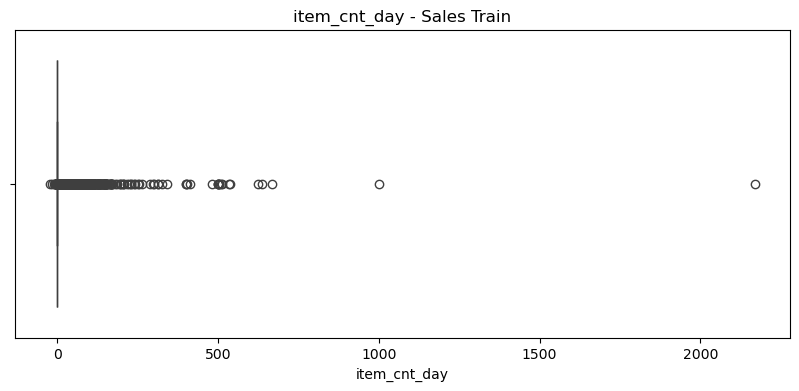

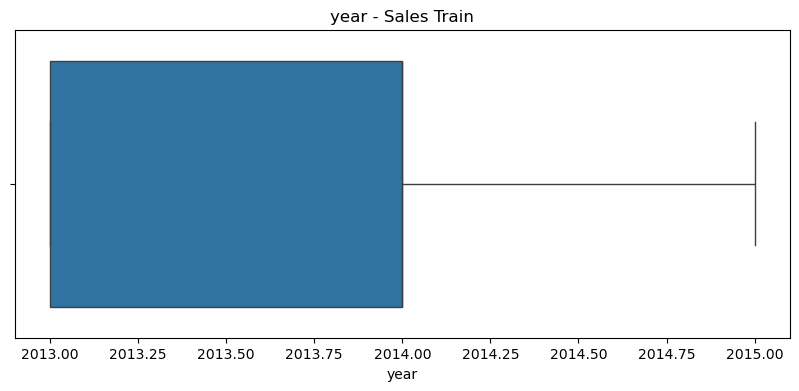

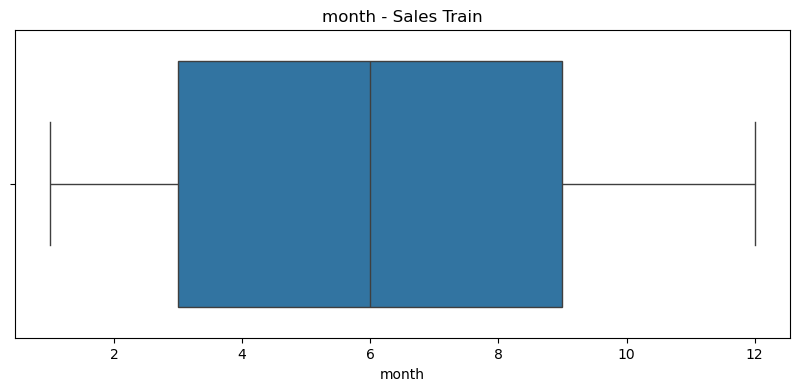

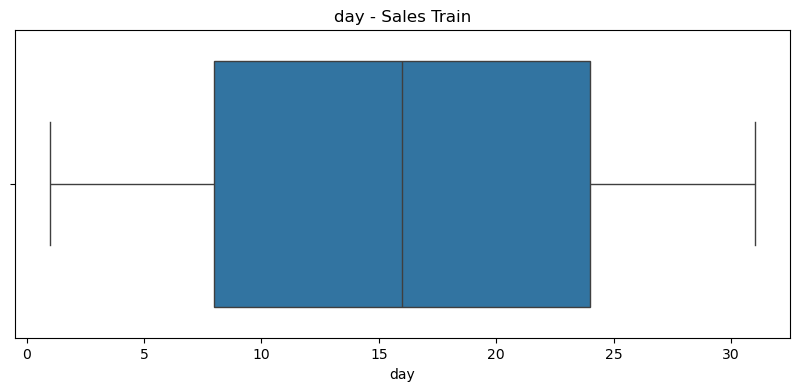

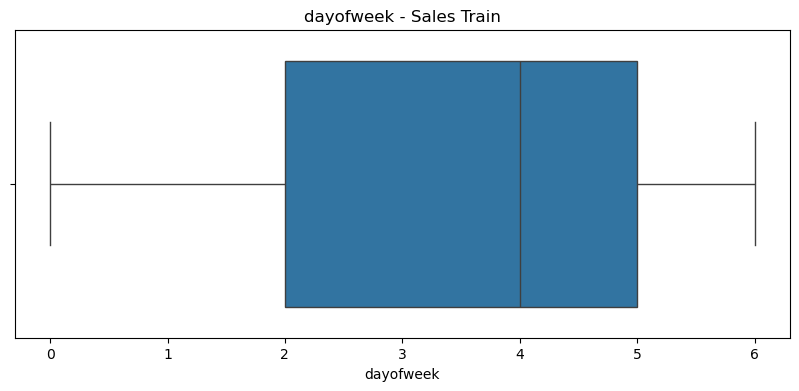

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to datetime format in sales_train dataset
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')

# Extract additional date features
sales_train['year'] = sales_train['date'].dt.year
sales_train['month'] = sales_train['date'].dt.month
sales_train['day'] = sales_train['date'].dt.day
sales_train['dayofweek'] = sales_train['date'].dt.dayofweek

# Checking distributions of all numerical variables in sales_train
numerical_columns = ['item_price', 'item_cnt_day', 'year', 'month', 'day', 'dayofweek']

def plot_histograms(df, columns, name):
    df[columns].hist(bins=50, figsize=(20, 15))
    plt.suptitle(f"Histograms for {name} dataset")
    plt.show()

plot_histograms(sales_train, numerical_columns, 'Sales Train')

# Displaying box plots for further analysis of outliers
def plot_boxplots(df, columns, name):
    for column in columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[column])
        plt.title(f'{column} - {name}')
        plt.show()

plot_boxplots(sales_train, numerical_columns, 'Sales Train')


#### Observations from Data Understanding Steps
- [x] Amount - Number of rows/columns
- [x] Data Types -  Data types for each column have been identified.
- [x] Data Concept - Columns have been categorized as numerical or categorical
- [x] Missing Data - No missing values in any of the datasets.
- [x] Distribution - Outliers in item_price and item_cnt_day have been identified.
- [x] Correlation - Correlation matrix visualized to understand relationships between numerical variables.
- [x] Visualization - Histograms and scatterplots provide a visual understanding of the data distribution and relationships.
1. Descriptive Statistics and Missing Values: Each dataset was summarized to understand their central tendencies, variability, and the presence of missing values.
2. Visualizations: Histograms of item_price and item_cnt_day highlighted skewness and potential outliers.
A time series plot of total sales revealed trends and seasonality in the sales data.
3. Correlation Analysis: The correlation matrix helped identify relationships between numerical variables, which is useful for feature selection and engineering.
4. Unique Shops in Test vs. Training Data:
The test dataset contains only 42 unique shops out of the 60 unique shops present in the sales_train dataset.
This means 18 shops are present in the training data but not in the test data. This discrepancy could affect the model’s ability to generalize if shop-specific trends are significant.

3. Data Preparation
Objective:

Clean and transform the data to prepare it for modeling.
Requirements:

Tools for data manipulation and cleaning (e.g., Pandas in Python).
Detailed understanding of data cleaning techniques.
Tasks:

Extracting city names from shop names

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [73]:
shops

,shop_id,city_code
0,0,0
1,1,0
2,2,1
3,3,2
4,4,3
5,5,4
6,6,5
7,7,5
8,8,5
9,9,6


In [70]:
# Shops

def shop_name2city(sn):
    sn = sn.split()
    if sn[0] == 'Цифровой' or sn[0] == 'Интернет-магазин': sn = 'Internet'
    if sn[0] == '!': sn = sn[1]
    else: sn = sn[0]
    return sn

shops['city_name'] = shops['shop_name'].apply(shop_name2city)
shops['city_id'] = LabelEncoder().fit_transform(shops['city_name']).astype('int8')
shops.head()

KeyError: 'shop_name'

Data Transformation


In [51]:
# Identify unique shop and item IDs across sales_train and test datasets
unique_shops = pd.concat([sales_train['shop_id'], test['shop_id']]).unique()
unique_items = pd.concat([sales_train['item_id'], test['item_id']]).unique()

# Label encoding for combined unique shop and item IDs
le_shop = LabelEncoder()
le_item = LabelEncoder()

# Fit the encoders on the combined unique data
le_shop.fit(unique_shops)
le_item.fit(unique_items)

# Transform the sales_train and test datasets
sales_train['shop_id_encoded'] = le_shop.transform(sales_train['shop_id'])
sales_train['item_id_encoded'] = le_item.transform(sales_train['item_id'])

test['shop_id_encoded'] = le_shop.transform(test['shop_id'])
test['item_id_encoded'] = le_item.transform(test['item_id'])

# Encode item categories in items dataset
le_item_category = LabelEncoder()
items['item_category_id_encoded'] = le_item_category.fit_transform(items['item_category_id'])
# Display the first few rows of the encoded datasets
print(items.head())
print(sales_train.head())
print(test.head())


                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  item_category_id_encoded  
0                40                        40  
1                76                        76  
2                40                        40  
3                40                        40  
4                40                        40  
        date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02               0       59    22154      999.00           1.0   
1 2013-01-03               0       25     2552      899.00           1.0   
2 2013-01-05               0       25     2552      899.00          -1.0   
3 2013-01-06     

1. Feature Engineering
Creating Lag Features:

Lag features capture the previous sales values and help the model learn trends.
Creating Aggregated Features:

Aggregate features, such as mean sales over different time periods, can help capture seasonality and trends.

In [54]:
import pandas as pd

# Create lag features for the sales data
# Aggregating data by month, shop, and item
monthly_sales = sales_train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum'}).reset_index()
monthly_sales.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

# Create lag features
def create_lag_features(df, lags, col):
    for lag in lags:
        lag_col = f'{col}_lag_{lag}'
        df[lag_col] = df.groupby(['shop_id', 'item_id'])[col].shift(lag)
    return df

# Create lag features for item_cnt_month
monthly_sales = create_lag_features(monthly_sales, [1, 2, 3, 6, 12], 'item_cnt_month')

# Mean encoded features
def mean_encoded_features(df, group_cols, target_col, new_col_name):
    group = df.groupby(group_cols).agg({target_col: 'mean'}).reset_index()
    group.rename(columns={target_col: new_col_name}, inplace=True)
    return df.merge(group, on=group_cols, how='left')

# Example: Average item count per month
monthly_sales = mean_encoded_features(monthly_sales, ['date_block_num'], 'item_cnt_month', 'date_avg_item_cnt')

# Dropping original date related columns to avoid multicollinearity
monthly_sales.drop(['date_block_num'], axis=1, inplace=True)

# Display the first few rows of the feature engineered dataset
print(monthly_sales.head())

   shop_id  item_id  item_cnt_month  item_cnt_month_lag_1  \
0        2       27             1.0                   NaN   
1        2       33             1.0                   NaN   
2        2      317             1.0                   NaN   
3        2      438             1.0                   NaN   
4        2      471             2.0                   NaN   

   item_cnt_month_lag_2  item_cnt_month_lag_3  item_cnt_month_lag_6  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

   item_cnt_month_lag_12  date_avg_item_cnt  
0                    NaN           2.079558  
1                    NaN           2.079558  
2                    NaN           2.079558  
3                    N

In [55]:
# Aggregating daily sales data to monthly sales data
monthly_sales = sales_train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum'}).reset_index()
monthly_sales.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

# Display the first few rows of the aggregated dataset
print(monthly_sales.head())


   date_block_num  shop_id  item_id  item_cnt_month
0               0        2       27             1.0
1               0        2       33             1.0
2               0        2      317             1.0
3               0        2      438             1.0
4               0        2      471             2.0


In [57]:
import numpy as np
from itertools import product

# Aggregate daily sales to monthly sales
matrix = []
cols = ['date_block_num', 'shop_id', 'item_id']
for i in range(34):
    sales = sales_train[sales_train['date_block_num'] == i]
    matrix.append(np.array(list(product([i], sales['shop_id'].unique(), sales['item_id'].unique()))))

matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols, inplace=True)

# Monthly sales
sales_train['revenue'] = sales_train['item_price'] * sales_train['item_cnt_day']
group = sales_train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum', 'revenue': 'sum'}).reset_index()
group.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'revenue']
matrix = pd.merge(matrix, group, on=cols, how='left')
matrix['item_cnt_month'] = (matrix['item_cnt_month'].fillna(0).clip(0, 20).astype(np.float16))

# Merge additional data
matrix = pd.merge(matrix, shops, on=['shop_id'], how='left')
matrix = pd.merge(matrix, items, on=['item_id'], how='left')
matrix = pd.merge(matrix, item_categories, on=['item_category_id'], how='left')

# Lag features
def lag_feature(df, lags, col):
    tmp = df[['date_block_num', 'shop_id', 'item_id', col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num', 'shop_id', 'item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num', 'shop_id', 'item_id'], how='left')
    return df

matrix = lag_feature(matrix, [1, 2, 3, 6, 12], 'item_cnt_month')


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Prepare the dataset for modeling
X = matrix.drop(['item_cnt_month'], axis=1)
y = matrix['item_cnt_month']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict and evaluate the baseline model
y_pred = baseline_model.predict(X_valid)
baseline_rmse = mean_squared_error(y_valid, y_pred, squared=False)
print(f'Baseline Model RMSE: {baseline_rmse}')


ValueError: could not convert string to float: 'Коломна ТЦ "Рио"'

In [59]:
import xgboost as xgb

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=300,
    colsample_bytree=0.8,
    subsample=0.8,
    eta=0.3,
    seed=42
)

xgb_model.fit(
    X_train,
    y_train,
    eval_metric="rmse",
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    verbose=True,
    early_stopping_rounds=10
)

# Predict and evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_valid)
xgb_rmse = mean_squared_error(y_valid, y_pred_xgb, squared=False)
print(f'XGBoost Model RMSE: {xgb_rmse}')


ModuleNotFoundError: No module named 'xgboost'

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Remove outliers
sales_train = sales_train[sales_train['item_price'] < 100000]
sales_train = sales_train[sales_train['item_cnt_day'] < 1001]

# Fix shop_id duplicates
sales_train.loc[sales_train['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 0, 'shop_id'] = 57
sales_train.loc[sales_train['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 1, 'shop_id'] = 58
sales_train.loc[sales_train['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 10, 'shop_id'] = 11

# Correct negative prices
median = sales_train[(sales_train['shop_id'] == 32) & (sales_train['item_id'] == 2973) & (sales_train['date_block_num'] == 4) & (sales_train['item_price'] > 0)].item_price.median()
sales_train.loc[sales_train['item_price'] < 0, 'item_price'] = median

# Extract city information from shop_name and encode
shops['city'] = shops['shop_name'].apply(lambda x: x.split(' ')[0])
le_city = LabelEncoder()
shops['city_code'] = le_city.fit_transform(shops['city'])
shops = shops[['shop_id', 'city_code']]

# Encode item categories into type_code and subtype_code
item_categories['split'] = item_categories['item_category_name'].str.split('-')
item_categories['type'] = item_categories['split'].map(lambda x: x[0].strip())
item_categories['subtype'] = item_categories['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
le_type = LabelEncoder()
item_categories['type_code'] = le_type.fit_transform(item_categories['type'])
le_subtype = LabelEncoder()
item_categories['subtype_code'] = le_subtype.fit_transform(item_categories['subtype'])
item_categories = item_categories[['item_category_id', 'type_code', 'subtype_code']]

# Drop item_name from items
items.drop(['item_name'], axis=1, inplace=True)

# Identify unique shop and item IDs across sales_train and test datasets
unique_shops = pd.concat([sales_train['shop_id'], test['shop_id']]).unique()
unique_items = pd.concat([sales_train['item_id'], test['item_id']]).unique()

# Label encoding for combined unique shop and item IDs
le_shop = LabelEncoder()
le_item = LabelEncoder()

# Fit the encoders on the combined unique data
le_shop.fit(unique_shops)
le_item.fit(unique_items)

# Transform the sales_train and test datasets
sales_train['shop_id_encoded'] = le_shop.transform(sales_train['shop_id'])
sales_train['item_id_encoded'] = le_item.transform(sales_train['item_id'])

test['shop_id_encoded'] = le_shop.transform(test['shop_id'])
test['item_id_encoded'] = le_item.transform(test['item_id'])

# Encode item categories in items dataset
le_item_category = LabelEncoder()
items['item_category_id_encoded'] = le_item_category.fit_transform(items['item_category_id'])

# Aggregating daily sales data to monthly sales data
matrix = []
cols = ['date_block_num', 'shop_id', 'item_id']
for i in range(34):
    sales = sales_train[sales_train['date_block_num'] == i]
    matrix.append(np.array(list(product([i], sales['shop_id'].unique(), sales['item_id'].unique()))))

matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols, inplace=True)

# Monthly sales
sales_train['revenue'] = sales_train['item_price'] * sales_train['item_cnt_day']
group = sales_train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum', 'revenue': 'sum'}).reset_index()
group.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'revenue']
matrix = pd.merge(matrix, group, on=cols, how='left')
matrix['item_cnt_month'] = (matrix['item_cnt_month'].fillna(0).clip(0, 20).astype(np.float16))

# Merge additional data
matrix = pd.merge(matrix, shops, on=['shop_id'], how='left')
matrix = pd.merge(matrix, items, on=['item_id'], how='left')
matrix = pd.merge(matrix, item_categories, on=['item_category_id'], how='left')

# Lag features
def lag_feature(df, lags, col):
    tmp = df[['date_block_num', 'shop_id', 'item_id', col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num', 'shop_id', 'item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num', 'shop_id', 'item_id'], how='left')
    return df

matrix = lag_feature(matrix, [1, 2, 3, 6, 12], 'item_cnt_month')

# Ensure there are no remaining string columns
print(matrix.select_dtypes(include=['object']).columns)

# Drop any remaining string columns if found
matrix = matrix.select_dtypes(exclude=['object'])

# Display the first few rows of the final matrix
print(matrix.head())


Index([], dtype='object')
   date_block_num  shop_id  item_id  item_cnt_month  revenue  city_code  \
0               0        2       19             0.0      NaN          1   
1               0        2       27             1.0   2499.0          1   
2               0        2       28             0.0      NaN          1   
3               0        2       29             0.0      NaN          1   
4               0        2       32             0.0      NaN          1   

   item_category_id  item_category_id_encoded  type_code  subtype_code  \
0                40                        40         11             4   
1                19                        19          5            10   
2                30                        30          8            55   
3                23                        23          5            16   
4                40                        40         11             4   

   item_cnt_month_lag_1  item_cnt_month_lag_2  item_cnt_month_lag_3  \
0      

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Prepare the dataset for modeling
X = matrix.drop(['item_cnt_month'], axis=1)
y = matrix['item_cnt_month']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict and evaluate the baseline model
y_pred = baseline_model.predict(X_valid)
baseline_rmse = mean_squared_error(y_valid, y_pred, squared=False)
print(f'Baseline Model RMSE: {baseline_rmse}')


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values